In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [4]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results




In [6]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

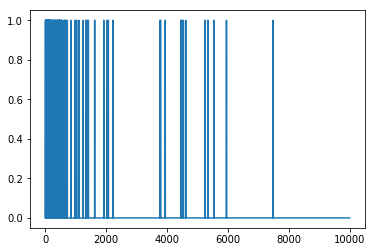

In [7]:
plt.plot(train_data[0])

In [8]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 7s - loss: 0.5163 - acc: 0.7857 - binary_crossentropy: 0.5163 - val_loss: 0.3723 - val_acc: 0.8688 - val_binary_crossentropy: 0.3723
Epoch 2/20
 - 5s - loss: 0.2763 - acc: 0.9076 - binary_crossentropy: 0.2763 - val_loss: 0.2913 - val_acc: 0.8872 - val_binary_crossentropy: 0.2913
Epoch 3/20
 - 3s - loss: 0.1974 - acc: 0.9319 - binary_crossentropy: 0.1974 - val_loss: 0.2863 - val_acc: 0.8863 - val_binary_crossentropy: 0.2863
Epoch 4/20
 - 3s - loss: 0.1572 - acc: 0.9469 - binary_crossentropy: 0.1572 - val_loss: 0.3086 - val_acc: 0.8782 - val_binary_crossentropy: 0.3086
Epoch 5/20
 - 3s - loss: 0.1271 - acc: 0.9589 - binary_crossentropy: 0.1271 - val_loss: 0.3249 - val_acc: 0.8771 - val_binary_crossentropy: 0.3249
Epoch 6/20
 - 3s - loss: 0.1034 - acc: 0.9689 - binary_crossentropy: 0.1034 - val_loss: 0.3542 - val_acc: 0.8727 - val_binary_crossentropy: 0.3542
Epoch 7/20
 - 3s - l

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6318 - acc: 0.6941 - binary_crossentropy: 0.6318 - val_loss: 0.5537 - val_acc: 0.8166 - val_binary_crossentropy: 0.5537
Epoch 2/20
 - 4s - loss: 0.4512 - acc: 0.8674 - binary_crossentropy: 0.4512 - val_loss: 0.3987 - val_acc: 0.8659 - val_binary_crossentropy: 0.3987
Epoch 3/20
 - 3s - loss: 0.3209 - acc: 0.8974 - binary_crossentropy: 0.3209 - val_loss: 0.3284 - val_acc: 0.8783 - val_binary_crossentropy: 0.3284
Epoch 4/20
 - 3s - loss: 0.2566 - acc: 0.9149 - binary_crossentropy: 0.2566 - val_loss: 0.2984 - val_acc: 0.8851 - val_binary_crossentropy: 0.2984
Epoch 5/20
 - 3s - loss: 0.2186 - acc: 0.9272 - binary_crossentropy: 0.2186 - val_loss: 0.2860 - val_acc: 0.8870 - val_binary_crossentropy: 0.2860
Epoch 6/20
 - 3s - loss: 0.1925 - acc: 0.9345 - binary_crossentropy: 0.1925 - val_loss: 0.2814 - val_acc: 0.8881 - val_binary_crossentropy: 0.2814
Epoch 7/20
 - 3s - loss: 0.1721 - acc: 0.9431 - binary_crossentropy:

In [12]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.3428 - acc: 0.8553 - binary_crossentropy: 0.3428 - val_loss: 0.3023 - val_acc: 0.8760 - val_binary_crossentropy: 0.3023
Epoch 2/20
 - 10s - loss: 0.1453 - acc: 0.9472 - binary_crossentropy: 0.1453 - val_loss: 0.3362 - val_acc: 0.8723 - val_binary_crossentropy: 0.3362
Epoch 3/20
 - 10s - loss: 0.0474 - acc: 0.9866 - binary_crossentropy: 0.0474 - val_loss: 0.4435 - val_acc: 0.8690 - val_binary_crossentropy: 0.4435
Epoch 4/20
 - 11s - loss: 0.0068 - acc: 0.9988 - binary_crossentropy: 0.0068 - val_loss: 0.6011 - val_acc: 0.8669 - val_binary_crossentropy: 0.6011
Epoch 5/20
 - 11s - loss: 9.2010e-04 - acc: 1.0000 - binary_crossentropy: 9.2010e-04 - val_loss: 0.6860 - val_acc: 0.8676 - val_binary_crossentropy: 0.6860
Epoch 6/20
 - 10s - loss: 2.4231e-04 - acc: 1.0000 - binary_crossentropy: 2.4231e-04 - val_loss: 0.7235 - val_acc: 0.8685 - val_binary_crossentropy: 0.7235
Epoch 7/20
 - 10s - loss: 1.3683e-04 - acc: 1.

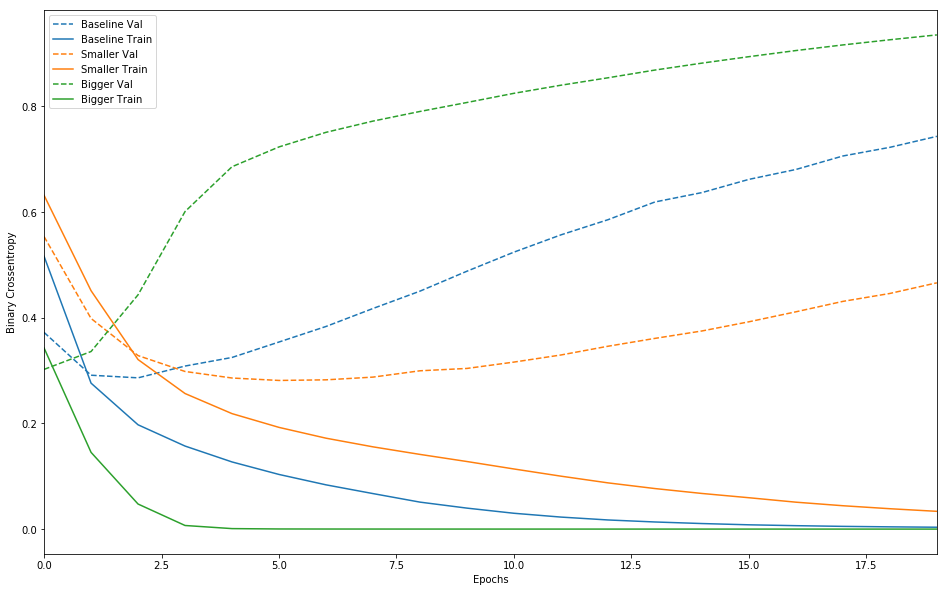

In [14]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [15]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.5205 - acc: 0.8130 - binary_crossentropy: 0.4805 - val_loss: 0.3695 - val_acc: 0.8806 - val_binary_crossentropy: 0.3273
Epoch 2/20
 - 5s - loss: 0.2947 - acc: 0.9116 - binary_crossentropy: 0.2480 - val_loss: 0.3340 - val_acc: 0.8880 - val_binary_crossentropy: 0.2842
Epoch 3/20
 - 5s - loss: 0.2439 - acc: 0.9328 - binary_crossentropy: 0.1917 - val_loss: 0.3405 - val_acc: 0.8848 - val_binary_crossentropy: 0.2867
Epoch 4/20
 - 5s - loss: 0.2228 - acc: 0.9423 - binary_crossentropy: 0.1673 - val_loss: 0.3606 - val_acc: 0.8776 - val_binary_crossentropy: 0.3038
Epoch 5/20
 - 5s - loss: 0.2066 - acc: 0.9506 - binary_crossentropy: 0.1487 - val_loss: 0.3707 - val_acc: 0.8764 - val_binary_crossentropy: 0.3120
Epoch 6/20
 - 5s - loss: 0.1946 - acc: 0.9556 - binary_crossentropy: 0.1350 - val_loss: 0.3841 - val_acc: 0.8742 - val_binary_crossentropy: 0.3239
Epoch 7/20
 - 5s - loss: 0.1869 - acc: 0.9589 - binary_crossentropy:

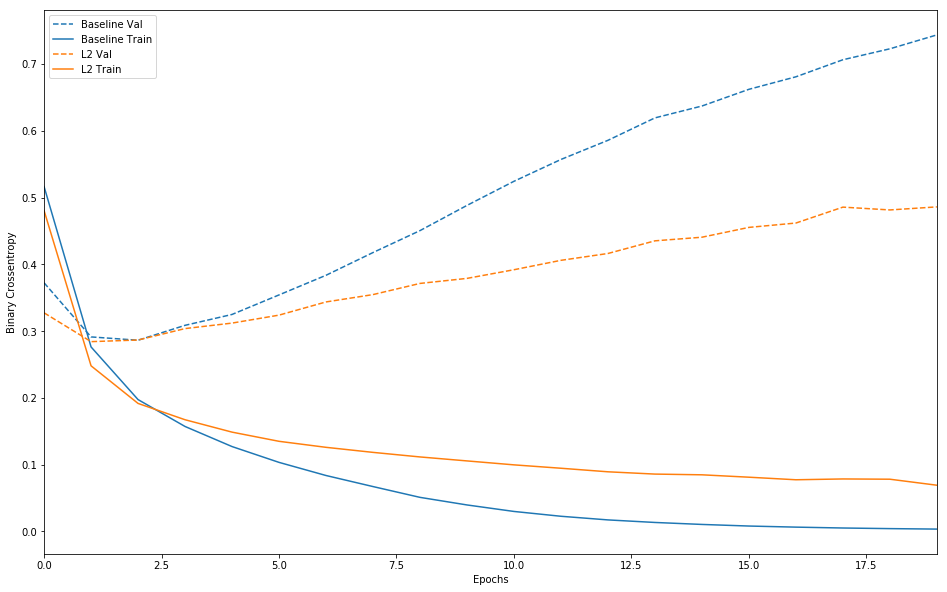

In [16]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [17]:
l1_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l1_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l1_model_history = l1_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 1.1091 - acc: 0.7852 - binary_crossentropy: 0.5486 - val_loss: 0.6196 - val_acc: 0.8498 - val_binary_crossentropy: 0.4335
Epoch 2/20
 - 5s - loss: 0.5580 - acc: 0.8590 - binary_crossentropy: 0.3828 - val_loss: 0.5313 - val_acc: 0.8594 - val_binary_crossentropy: 0.3582
Epoch 3/20
 - 5s - loss: 0.5084 - acc: 0.8680 - binary_crossentropy: 0.3351 - val_loss: 0.5060 - val_acc: 0.8670 - val_binary_crossentropy: 0.3318
Epoch 4/20
 - 5s - loss: 0.4906 - acc: 0.8737 - binary_crossentropy: 0.3179 - val_loss: 0.4969 - val_acc: 0.8675 - val_binary_crossentropy: 0.3244
Epoch 5/20
 - 5s - loss: 0.4766 - acc: 0.8780 - binary_crossentropy: 0.3064 - val_loss: 0.4854 - val_acc: 0.8703 - val_binary_crossentropy: 0.3165
Epoch 6/20
 - 5s - loss: 0.4638 - acc: 0.8822 - binary_crossentropy: 0.2971 - val_loss: 0.4794 - val_acc: 0.8709 - val_binary_crossentropy: 0.3139
Epoch 7/20
 - 5s - loss: 0.4523 - acc: 0.8852 - binary_crossentropy:

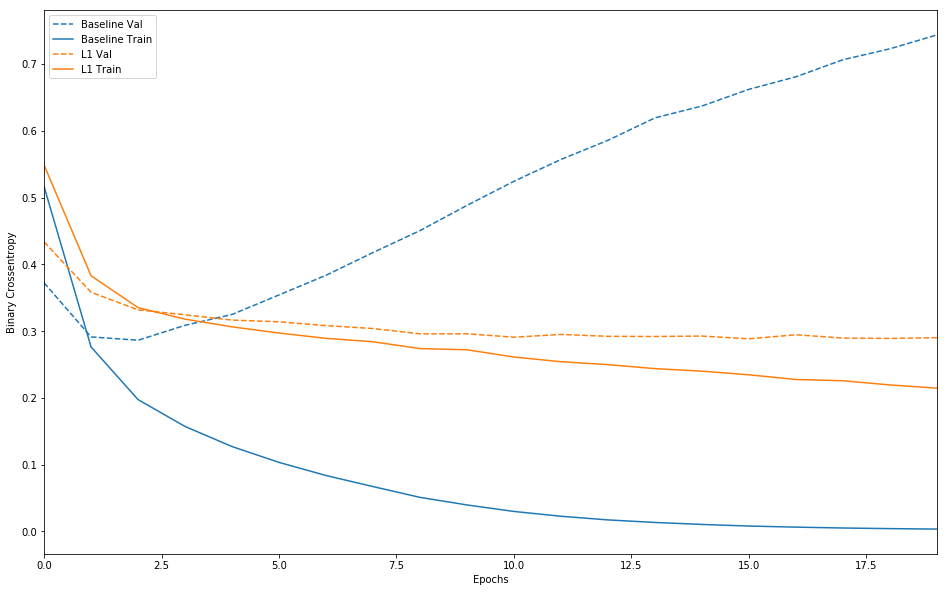

In [18]:
plot_history([('baseline', baseline_history),
              ('l1', l1_model_history)])

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.6414 - acc: 0.6126 - binary_crossentropy: 0.6414 - val_loss: 0.5410 - val_acc: 0.7955 - val_binary_crossentropy: 0.5410
Epoch 2/20
 - 4s - loss: 0.4996 - acc: 0.8146 - binary_crossentropy: 0.4996 - val_loss: 0.4121 - val_acc: 0.8789 - val_binary_crossentropy: 0.4121
Epoch 3/20
 - 5s - loss: 0.3929 - acc: 0.8804 - binary_crossentropy: 0.3929 - val_loss: 0.3401 - val_acc: 0.8866 - val_binary_crossentropy: 0.3401
Epoch 4/20
 - 3s - loss: 0.3283 - acc: 0.9019 - binary_crossentropy: 0.3283 - val_loss: 0.3061 - val_acc: 0.8881 - val_binary_crossentropy: 0.3061
Epoch 5/20
 - 3s - loss: 0.2709 - acc: 0.9199 - binary_crossentropy: 0.2709 - val_loss: 0.2983 - val_acc: 0.8871 - val_binary_crossentropy: 0.2983
Epoch 6/20
 - 3s - loss: 0.2361 - acc: 0.9310 - binary_crossentropy: 0.2361 - val_loss: 0.2959 - val